최규빈 교수님 통계전산 수업 정리

수업에서는 Julia를 사용하지만 필요한 부분만 Python으로 바꾸어 작성하겠다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 통계 전산

## 로드맵

`-` 통계

- 일반통계학 개념의 백업
- 여러가지 분포리뷰, 어떠한 분포에서 샘플을 추출하는 방법
- 수렴
- 추정 및 검정
- 부트스트랩
- 선형회귀분석

`-` 선형대수학

- 백터공간, rank
- 직교행렬, 사영행렬, 양정치행렬...
- 매트릭스를 해석하는 방식 (이미지, 데이터프레임, 변환)...
- 분해이론: 고유값분해, SVD
- 벡터나 매트릭스의 미분..

## 베르누이

## 이항분포

1회당 성공확률이 p. n번을 시행해서 성공한 횟수가 X. 이를 N번 반복해서 나온 성공값들을 분포로 나타낸게 이항분포?

## 포아송분포

`-` 포아송분포의 요약

- X의의미: 발생횟수의 평균이 λ인 분포에서 실제 발생횟수를 X라고 한다.

- X의범위: 발생안할수도 있으므로 X=0이 가능. 따라서 X=0,1,2,3,...

- 파라메터의 의미와 범위: λ = 평균적인 발생횟수; λ>0.

- pdf:

- mgf:

- E(X): λ

- V(X): λ

단위시간동안 어떤 이벤트가 발생했는데, 그 이벤트의 횟수가 포아송.

### [포아송분포의 예시](https://www.statology.org/poisson-distribution-real-life-examples/#:~:text=Example%201%3A%20Calls%20per%20Hour,receives%2010%20calls%20per%20hour.)

- 콜센타에 걸려오는 전화의 수, 1시간동안

- 레스토랑에 방문하는 손님의 수, 하루동안

- 웹사이트를 방문하는 사람의 수, 1시간동안

- 파산하는 사람의 수, 1달동안

- 네트워크의 끊김 수, 1주일동안

#### How to generate it?

평균 3인 포아송분포에서 100개 샘플을 뽑는 방법

방법1)

In [16]:
pois = np.random.poisson(3, 100)
pois

array([ 3,  4,  0,  7,  1,  3,  3,  5,  3,  2,  2,  6,  3,  5,  3,  2,  1,
        4,  4,  2,  8,  3,  3,  3,  2,  0,  3,  5,  2,  2,  2,  2,  5,  4,
        4,  7,  3,  5,  6,  2,  2,  1,  7,  3,  3,  1,  5,  5,  5,  6,  2,
        3,  3,  3,  2,  5,  2,  6,  2,  5,  4,  0,  3,  4,  2,  0,  3,  3,
        3,  4,  2,  3,  1,  1,  1,  5,  6,  2,  1,  3,  3,  3,  2,  7,  4,
        2,  2,  4,  3,  1,  5,  2, 10,  6,  2,  4,  0,  3,  2,  1])

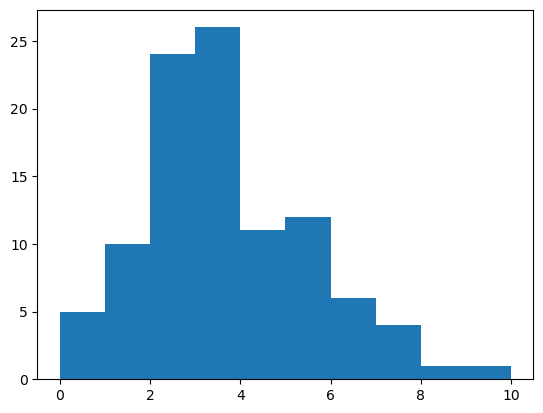

In [17]:
plt.hist(pois);

# bar plot으로 나타내는 법
# unique_values, count = np.unique(pois, return_counts=True)
# plt.bar(unique_values, count)
# ax = plt.gca()
# ax.set_xlim([-1,11])
# plt.title("pois")
# plt.xticks(np.arange(0,11,1)); # x축 1간격

방법2) 이항분포의 포아송근사를 이용

이론: 이항분포에서 (1) $n→\infty$ (2) $p→0$ (3) $np=\lambda$ 이면 이것은 평균이 $\lambda$ 인 포아송분포로 근사함.

평균이 $\lambda$ 인 포아송분포는 $B(n,\frac{\lambda}{n})$ 로 근사할 수 있다. 이때
$n$이 커질수록 더 정확해짐.

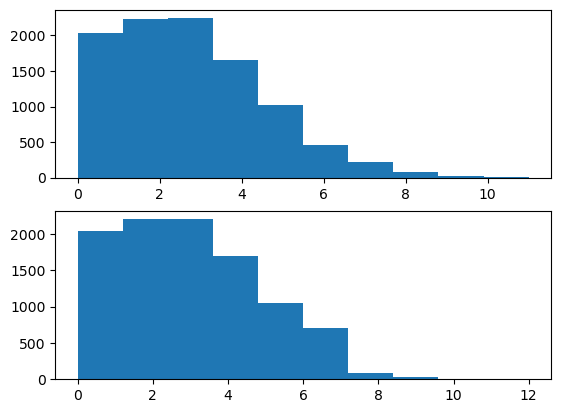

In [6]:
N = 10000
λ = 3
n = 10000
p = λ/n
X = np.random.binomial(n, p, N)
Y = np.random.poisson(λ, N)

fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax1.hist(X);
ax2.hist(Y);

방법3) 균등분포 → 베르누이 → 이항분포 ≈ 포아송

- 1분동안 맥도날드에 평균 3명이 온다고 생각
- 이건 사실 1초에 성공확률이 0.05인 베르누이 시행을 1번 시행하여 1분동안 총 60회 반복한 것으로 이해할 수 있음.
- 좀 더 세밀하게는 0.001초에 성공확률이 5.0e-5인 베르누이 시행을 1번 시행하여 1분동안 총 60000회 반복한 것으로도 이해할 수 있음. (무한반복 가능)
- 느낌: 하여튼 (1) "엄청 작은 시간"에 (2) "엄청 작은 확률"의 베르누이 시행이 (3) "엄청 많이 독립적으로 반복" 되는 느낌을 기억!! = 포아송 프로세스


In [7]:
λ=3
n=60000
p=λ/n
Δt = (60/n) # 단위가 60초니까 60

N = 10000
X = [sum(np.random.uniform(0,1,n)<p) for i in range(N)]

Text(0.5, 1.0, 'Poisson')

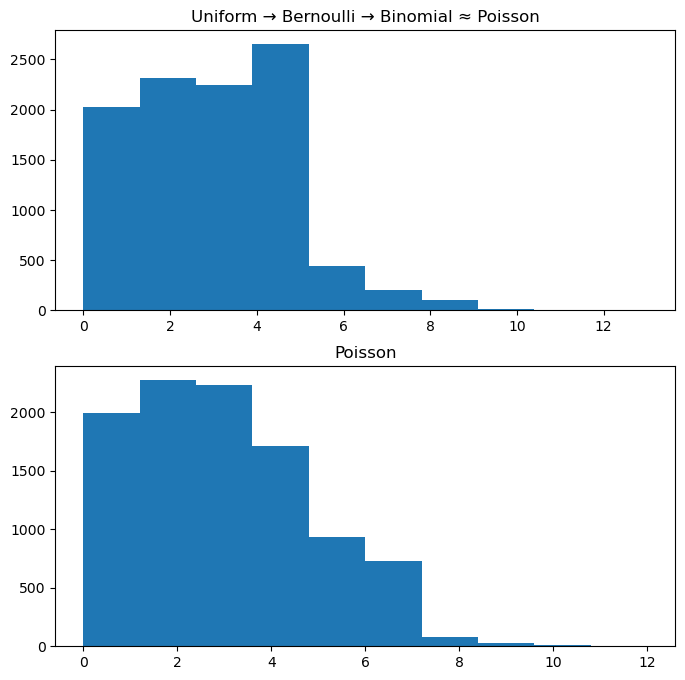

In [8]:
fig, ((ax1), (ax2)) = plt.subplots(2,1, figsize=(8,8))

ax1.hist(X)
ax2.hist(np.random.poisson(λ, N));

ax1.set_title("Uniform → Bernoulli → Binomial ≈ Poisson")
ax2.set_title("Poisson")

방법4) 균등분포 → inverse cdf method를 이용해서 생성할 수 있음.

> `-` Inverse CDF Method??
> 모든 확률 분포의 누적 분포 함수(cumulative distribution function, cdf)가 균등분포를 따른다는 성질을 이용한 방법

> 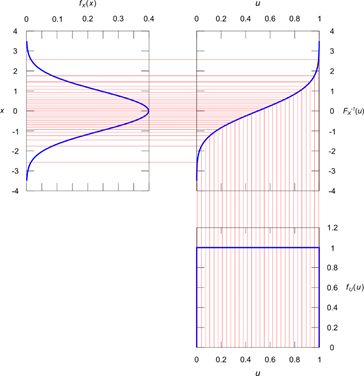

> 보통 난수를 일으킬 때에는 균등분포 난수 생성기를 이용하여 난수를 일으킨다.
> 그런데 만약 어떤 특정한 함수를 따르는 난수를 만들어내고 싶다면??
> Inverse CDF Method를 사용하면 된다. 추후 수식 관련하여 자세히 다루기.

- 포아송 분포의 합은 다시 포아송분포가 된다.

- 이론: $X \sim Poi(\lambda_1), Y \sim Poi(\lambda_2), X \bot Y \Rightarrow X+Y\sim Poi(\lambda_1+\lambda_2)$
- 의미?: (1) 1분동안 맥도날드 매장에 들어오는 남자의 수는 평균이 5인 포아송 분포를 따름. (2) 1분동안 맥도날드 매장에 들어오는 여자의 수는 평균이 4.5인 포아송 분포를 따름. (3) 남자와 여자가 매장에 오는 사건은 독립 $\rightarrow$ 1분동안 맥도날드 매장에 오는 사람은 평균 9.5인 포아송 분포를 따른다는 의미

In [18]:
N = 1000
X = np.random.poisson(5, N)
Y = np.random.poisson(4.5, N)

p1 = X+Y
p2 = np.random.poisson(9.5, N)

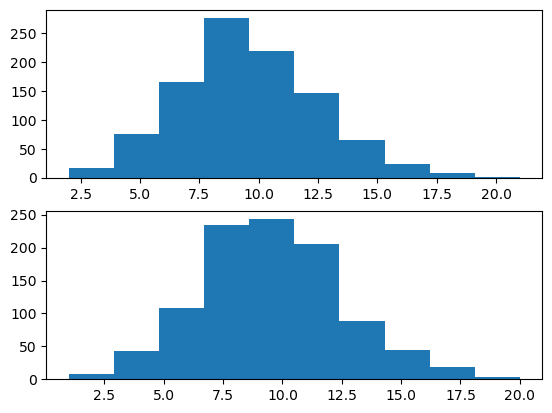

In [19]:
fig, ((ax1), (ax2)) = plt.subplots(2,1)
ax1.hist(p1)
ax2.hist(p2);

#### 평균과 분산의 추정

In [11]:
N = 1000
λ=5
X=np.random.poisson(λ, N)

print(f"평균: {λ}\
      \n평균의 추정치: {np.mean(X)}\
      \n분산: {λ}\
      \n분산의 추정치: {np.var(X)}")

평균: 5      
평균의 추정치: 4.914      
분산: 5      
분산의 추정치: 5.134604


`-` 생각해보니까 이론적으로 평균과 분산의 값이 같아야 한다는 걸 알고 있다. 그런데 왜 추정치가 달라야하나?? 둘 중 하나만 있으면 될 것 같다.

mean(X), var(X)로 $\lambda$를 추정

In [12]:
N = 10000
λ = 5

p1 = [np.mean(np.random.poisson(λ, N)) for i in range(100)]
p2 = [np.var(np.random.poisson(λ, N)) for i in range(100)]

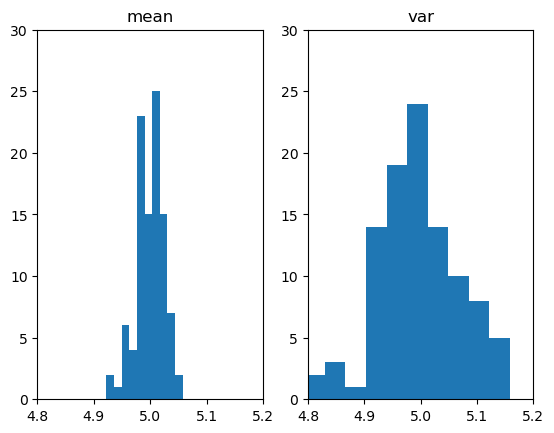

In [13]:
fig, ((ax1), (ax2)) = plt.subplots(1,2)

ax1.set_xlim([4.8, 5.2])
ax2.set_xlim([4.8, 5.2])

ax1.set_ylim([0, 30])
ax2.set_ylim([0, 30])

ax1.hist(p1)
ax2.hist(p2)

ax1.set_title("mean")
ax2.set_title("var");

- 히스토그램을 그려보니까 누가봐도 mean(X)로 λ를 추정하는 것이 var(X)로 λ를 추정하는 것보다 좋아보인다.

- 그냥 평균을 추정한다음 이 값을 평균과 분산이라고 주장하면 안되나? $\Rightarrow$ 된다!! 이게 바로 MLE